# 케라스 창시자에게 배우는 딥러닝 - IMDB 데이터셋 추가 실험
이 커널은 다음과 같은 형태로 진행 됩니다.  
1. IMDB 데이터셋 예제
2. 1개 또는 3개의 은닉층 사용
3. 층의 은닉 유닛 추가 또는 줄이기
4. 손실 함수 mse 사용
5. tahn 활성화 함수 사용


 

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [ ]:
from keras import models
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
def model_val(hidden_unit, epochs, layer, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc']):
    model = models.Sequential()
    model.add(Dense(hidden_unit, activation = activation, input_shape = (10000,)))
    for i in range(1, layer):
        model.add(Dense(hidden_unit, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = 'rmsprop',
                  loss = loss,
                  metrics = metrics)
    
    history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = epochs,
                    batch_size = 512,
                    validation_data = (x_val, y_val))
    history_dict = history.history
    return history_dict
    

In [ ]:
def model_test(hidden_unit, epochs, layer, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc']):
    model = models.Sequential()
    model.add(Dense(hidden_unit, activation = activation, input_shape = (10000,)))
    for i in range(1, layer):
        model.add(Dense(hidden_unit, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(optimizer = 'rmsprop',
                  loss = loss,
                  metrics = metrics)
    
    model.fit(x_train,
              y_train,
              epochs = epochs,
              batch_size = 512)
    
    results = model.evaluate(x_test, y_test)

    return results
    

In [ ]:
def loss_plot(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.show()

def acc_plot(history_dict):
    plt.clf()
    acc = history_dict['acc']
    val_acc = history_dict['val_acc']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.show()

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## 1. IMDB 데이터셋 예제

In [ ]:
history_dict = model_val(16, 20, 2, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.5792 - acc: 0.7165 - val_loss: 0.4604 - val_acc: 0.8595
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3773 - acc: 0.8927 - val_loss: 0.3481 - val_acc: 0.8828
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2664 - acc: 0.9215 - val_loss: 0.2996 - val_acc: 0.8883
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2023 - acc: 0.9373 - val_loss: 0.2835 - val_acc: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1609 - acc: 0.9530 - val_loss: 0.2815 - val_acc: 0.8892
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1277 - acc: 0.9634 - val_loss: 0.3095 - val_acc: 0.8825
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1028 - acc: 0.9709 - val_loss: 0.3216 - val_acc: 0.8799
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0850 - a

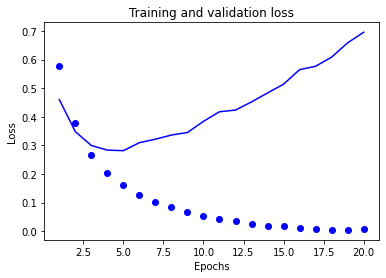

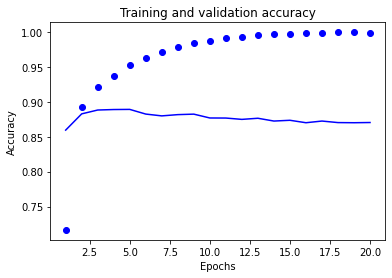

In [ ]:
loss_plot(history_dict)
acc_plot(history_dict)

In [ ]:
model_test(16, 5, 2, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/5
49/49 [==============================] - 1s 12ms/step - loss: 0.4789 - acc: 0.8228
Epoch 2/5
49/49 [==============================] - 1s 12ms/step - loss: 0.2722 - acc: 0.9066
Epoch 3/5
49/49 [==============================] - 1s 11ms/step - loss: 0.2050 - acc: 0.9279
Epoch 4/5
49/49 [==============================] - 1s 11ms/step - loss: 0.1713 - acc: 0.9390
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.3060 - acc: 0.8815


[0.3060252368450165, 0.8815199732780457]

약 88.2%의 정확도

## 1개 또는 3개의 은닉층 사용

### 1개의 은닉층 사용

In [ ]:
history_dict = model_val(16, 20, 1, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4822 - acc: 0.8014 - val_loss: 0.3740 - val_acc: 0.8680
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3016 - acc: 0.9053 - val_loss: 0.3084 - val_acc: 0.8865
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.2323 - acc: 0.9280 - val_loss: 0.2892 - val_acc: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1912 - acc: 0.9417 - val_loss: 0.2787 - val_acc: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1631 - acc: 0.9489 - val_loss: 0.2736 - val_acc: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1399 - acc: 0.9581 - val_loss: 0.3112 - val_acc: 0.8746
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1222 - acc: 0.9661 - val_loss: 0.2918 - val_acc: 0.8826
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1073 - a

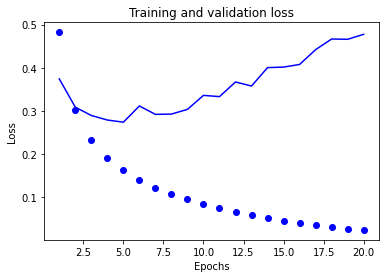

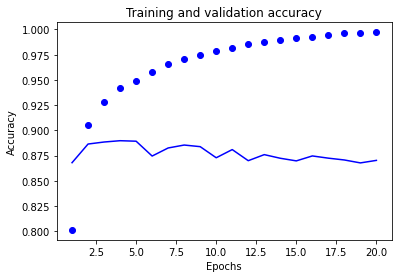

In [ ]:
loss_plot(history_dict)
acc_plot(history_dict)

In [ ]:
model_test(16, 4, 1, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4482 - acc: 0.8246
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2741 - acc: 0.9074
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2177 - acc: 0.9263
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2810 - acc: 0.8879


[0.2810062766075134, 0.8878800272941589]

약 88.8%의 정확도

### 3개의 은닉층 사용

In [ ]:
history_dict = model_val(16, 20, 3, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5273 - acc: 0.7661 - val_loss: 0.3882 - val_acc: 0.8758
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3067 - acc: 0.9039 - val_loss: 0.3338 - val_acc: 0.8708
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2182 - acc: 0.9318 - val_loss: 0.2882 - val_acc: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1712 - acc: 0.9456 - val_loss: 0.2822 - val_acc: 0.8866
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1375 - acc: 0.9556 - val_loss: 0.2916 - val_acc: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1088 - acc: 0.9672 - val_loss: 0.4145 - val_acc: 0.8531
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0933 - acc: 0.9725 - val_loss: 0.3291 - val_acc: 0.8805
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0753 - a

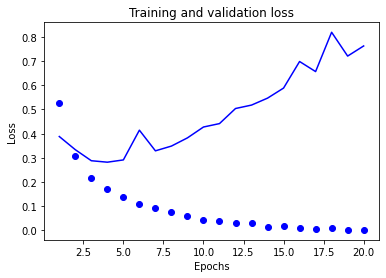

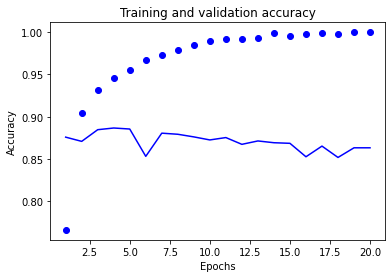

In [ ]:
loss_plot(history_dict)
acc_plot(history_dict)

In [ ]:
model_test(16, 4, 3, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4660 - acc: 0.8148
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2641 - acc: 0.9086
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1983 - acc: 0.9287
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2995 - acc: 0.8840


[0.2995058000087738, 0.8839600086212158]

정확도 약 88.4%

## 층의 은닉 유닛 추가 또는 줄이기
### 은닉 유닛 8개


In [ ]:
history_dict = model_val(8, 20, 2, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5364 - acc: 0.7852 - val_loss: 0.4229 - val_acc: 0.8616
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3461 - acc: 0.8953 - val_loss: 0.3374 - val_acc: 0.8792
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2602 - acc: 0.9209 - val_loss: 0.2992 - val_acc: 0.8842
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.2092 - acc: 0.9351 - val_loss: 0.2782 - val_acc: 0.8908
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1754 - acc: 0.9467 - val_loss: 0.2817 - val_acc: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1483 - acc: 0.9557 - val_loss: 0.2757 - val_acc: 0.8905
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1259 - acc: 0.9627 - val_loss: 0.2832 - val_acc: 0.8887
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1102 - a

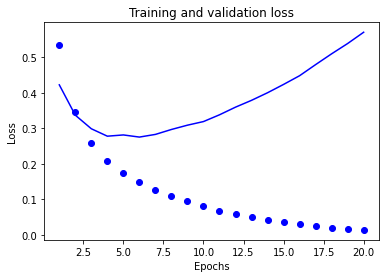

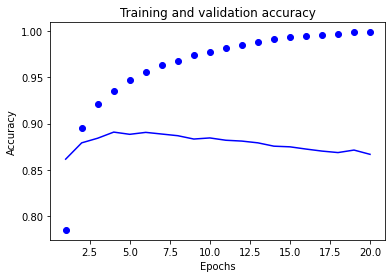

In [ ]:
loss_plot(history_dict)
acc_plot(history_dict)

In [ ]:
model_test(8, 4, 2, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5158 - acc: 0.8146
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.3152 - acc: 0.8993
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2372 - acc: 0.9206
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2799 - acc: 0.8879


[0.2798818051815033, 0.8878800272941589]

정확도 약 88.8%

### 은닉 유닛 32개


In [ ]:
history_dict = model_val(32, 20, 2, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/20
30/30 [==============================] - 1s 48ms/step - loss: 0.4964 - acc: 0.7800 - val_loss: 0.3611 - val_acc: 0.8765
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2849 - acc: 0.9051 - val_loss: 0.2941 - val_acc: 0.8910
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2076 - acc: 0.9307 - val_loss: 0.3366 - val_acc: 0.8611
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1560 - acc: 0.9483 - val_loss: 0.2816 - val_acc: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1272 - acc: 0.9574 - val_loss: 0.3676 - val_acc: 0.8620
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1021 - acc: 0.9680 - val_loss: 0.3139 - val_acc: 0.8831
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0777 - acc: 0.9765 - val_loss: 0.3377 - val_acc: 0.8827
Epoch 8/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0600 - a

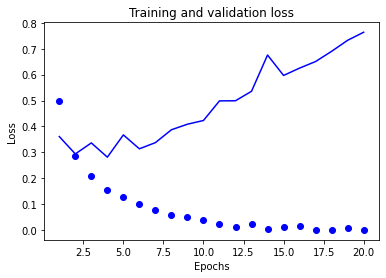

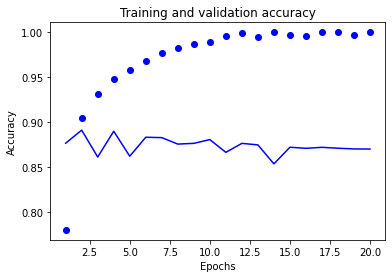

In [ ]:
loss_plot(history_dict)
acc_plot(history_dict)

In [ ]:
model_test(32, 4, 2, activation = 'relu', loss = 'binary_crossentropy', metrics = ['acc'])

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4304 - acc: 0.8153
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2365 - acc: 0.9135
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1894 - acc: 0.9295
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3334 - acc: 0.8756


[0.3334212005138397, 0.8755599856376648]

정확도 약 87.6%

## 손실 함수 mse 사용

In [ ]:
history_dict = model_val(16, 20, 2, activation = 'relu', loss = 'mse', metrics = ['acc'])

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1764 - acc: 0.7856 - val_loss: 0.1251 - val_acc: 0.8720
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0965 - acc: 0.9066 - val_loss: 0.0979 - val_acc: 0.8833
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0689 - acc: 0.9278 - val_loss: 0.0893 - val_acc: 0.8847
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0540 - acc: 0.9431 - val_loss: 0.0848 - val_acc: 0.8888
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0430 - acc: 0.9556 - val_loss: 0.0823 - val_acc: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0355 - acc: 0.9645 - val_loss: 0.0834 - val_acc: 0.8864
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0298 - acc: 0.9701 - val_loss: 0.0850 - val_acc: 0.8849
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0241 - a

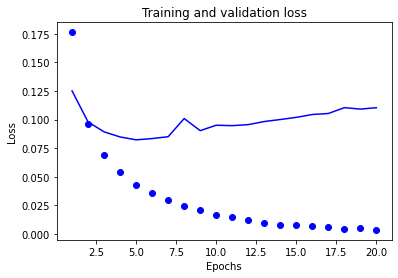

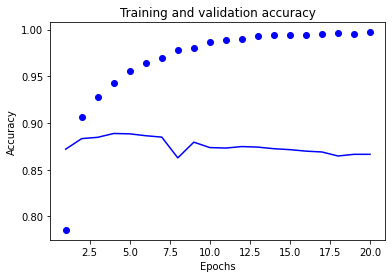

In [ ]:
loss_plot(history_dict)
acc_plot(history_dict)

In [ ]:
model_test(16, 4, 2, activation = 'relu', loss = 'mse', metrics = ['acc'])

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.1552 - acc: 0.8250
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0820 - acc: 0.9080
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0604 - acc: 0.9286
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.0851 - acc: 0.8844


[0.0850871205329895, 0.8844000101089478]

정확도 약 88.4%

## tahn 활성화 함수 사용

In [ ]:
history_dict = model_val(16, 20, 2, activation = 'tanh', loss = 'mse', metrics = ['acc'])

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1607 - acc: 0.7962 - val_loss: 0.1284 - val_acc: 0.8298
Epoch 2/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0809 - acc: 0.9101 - val_loss: 0.0866 - val_acc: 0.8904
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0561 - acc: 0.9351 - val_loss: 0.0822 - val_acc: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0414 - acc: 0.9519 - val_loss: 0.1010 - val_acc: 0.8623
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0314 - acc: 0.9645 - val_loss: 0.1065 - val_acc: 0.8600
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0230 - acc: 0.9748 - val_loss: 0.0908 - val_acc: 0.8804
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0191 - acc: 0.9788 - val_loss: 0.0988 - val_acc: 0.8720
Epoch 8/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0162 - a

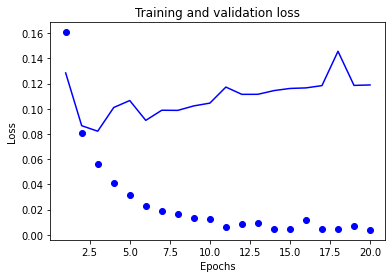

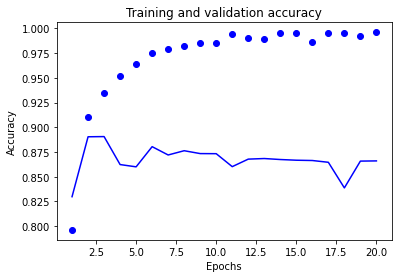

In [ ]:
loss_plot(history_dict)
acc_plot(history_dict)

In [ ]:
model_test(16, 3, 2, activation = 'tanh', loss = 'mse', metrics = ['acc'])

Epoch 1/3
49/49 [==============================] - 1s 12ms/step - loss: 0.1335 - acc: 0.8249
Epoch 2/3
49/49 [==============================] - 1s 12ms/step - loss: 0.0678 - acc: 0.9141
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0966 - acc: 0.8704


[0.09658977389335632, 0.8704400062561035]

정확도 약 87%

대체적으로 정확도는 비슷하게 나옴

하지만, 그래프 모양에서 차이를 보임  
- 은닉 유닛의 수가 적고 층의 수가 2인 모델의 그래프는 곡선 형태
- `tahn`의 활성화 함수는 좀 더 각진 형태의 그래프
